In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nechbamohammed/research-papers-dataset")

print("Path to dataset files:", path)

import shutil

# Define destination folder in your Google Drive
drive_path = '/content/drive/My Drive/KaggleDatasets/research-papers-dataset'

# Move the dataset folder to Google Drive
shutil.move(path, drive_path)

print(f"Dataset moved to: {drive_path}")


100%|██████████| 590M/590M [00:12<00:00, 50.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nechbamohammed/research-papers-dataset/versions/1
Dataset moved to: /content/drive/My Drive/KaggleDatasets/research-papers-dataset


In [4]:
import pandas as pd

# Define the file path
csv_path = "/content/drive/My Drive/KaggleDatasets/research-papers-dataset/dblp-v10.csv"

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows
df.head()


,abstract,authors,n_citation,references,title,venue,year,id
0,"In this paper, a robust 3D triangular mesh wat...","['S. Ben Jabra', 'Ezzeddine Zagrouba']",50,"['09cb2d7d-47d1-4a85-bfe5-faa8221e644b', '10aa...",A new approach of 3D watermarking based on ima...,international symposium on computers and commu...,2008,4ab3735c-80f1-472d-b953-fa0557fed28b
1,We studied an autoassociative neural network w...,"['Joaquín J. Torres', 'Jesús M. Cortés', 'Joaq...",50,"['4017c9d2-9845-4ad2-ad5b-ba65523727c5', 'b118...",Attractor neural networks with activity-depend...,Neurocomputing,2007,4ab39729-af77-46f7-a662-16984fb9c1db
2,It is well-known that Sturmian sequences are t...,"['Genevi eve Paquin', 'Laurent Vuillon']",50,"['1c655ee2-067d-4bc4-b8cc-bc779e9a7f10', '2e4e...",A characterization of balanced episturmian seq...,Electronic Journal of Combinatorics,2007,4ab3a4cf-1d96-4ce5-ab6f-b3e19fc260de
3,One of the fundamental challenges of recognizi...,"['Yaser Sheikh', 'Mumtaz Sheikh', 'Mubarak Shah']",221,"['056116c1-9e7a-4f9b-a918-44eb199e67d6', '05ac...",Exploring the space of a human action,international conference on computer vision,2005,4ab3a98c-3620-47ec-b578-884ecf4a6206
4,This paper generalizes previous optimal upper ...,"['Efraim Laksman', 'Håkan Lennerstad', 'Magnus...",0,"['01a765b8-0cb3-495c-996f-29c36756b435', '5dbc...",Generalized upper bounds on the minimum distan...,Ima Journal of Mathematical Control and Inform...,2015,4ab3b585-82b4-4207-91dd-b6bce7e27c4e


1.1.1

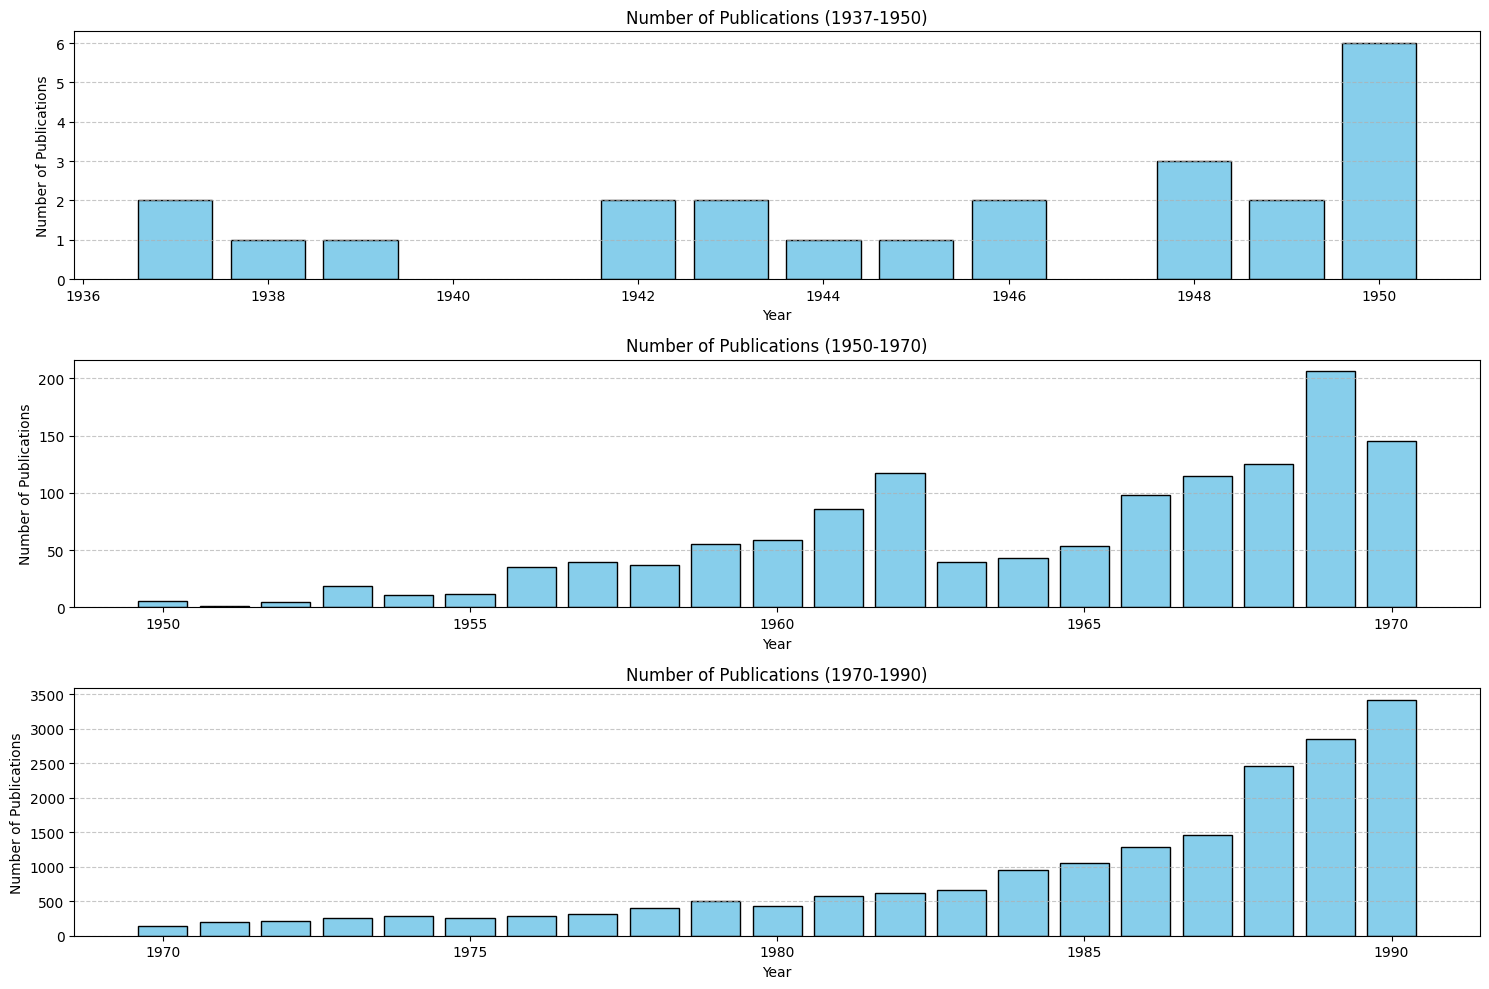

In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'year' column is numeric
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Define year ranges
ranges = {
    "1937-1950": (1937, 1950),
    "1950-1970": (1950, 1970),
    "1970-1990": (1970, 1990)
}

# Initialize a figure for plotting
plt.figure(figsize=(15, 10))

# Create a bar chart for each range
for i, (label, (start_year, end_year)) in enumerate(ranges.items(), start=1):
    # Filter data for the given range
    range_df = df[(df['year'] >= start_year) & (df['year'] <= end_year)]

    # Count publications by year
    year_counts = range_df['year'].value_counts().sort_index()

    # Plot the bar chart
    plt.subplot(3, 1, i)  # Create a subplot for each range
    plt.bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
    plt.title(f"Number of Publications ({label})")
    plt.xlabel("Year")
    plt.ylabel("Number of Publications")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


1.1.2

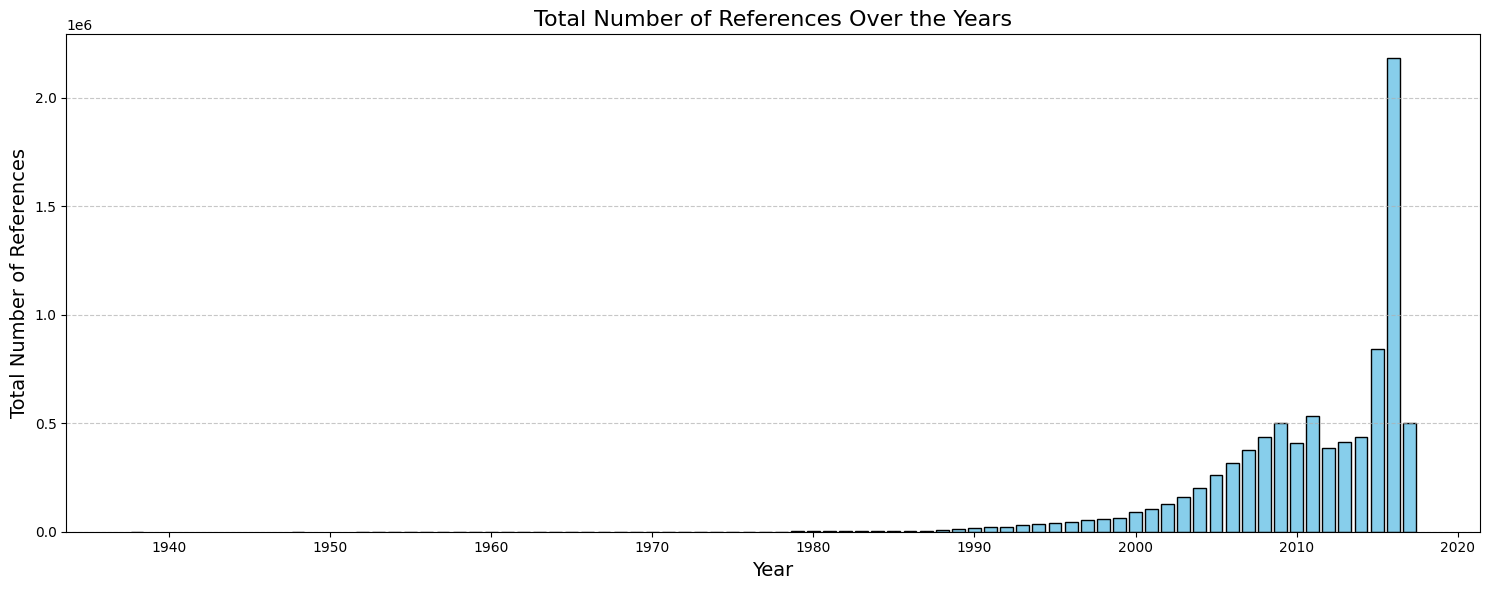

In [ ]:
import ast

# Convert 'references' column to list if it's stored as a string
def count_references(refs):
    try:
        # Safely evaluate strings that look like lists
        return len(ast.literal_eval(refs)) if isinstance(refs, str) else 0
    except (ValueError, SyntaxError):
        return 0

df['num_references'] = df['references'].apply(count_references)

# Group by year and calculate total number of references
yearly_references = df.groupby('year')['num_references'].sum()

# Drop years with NaN or 0 references
yearly_references = yearly_references[yearly_references > 0]

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(yearly_references.index, yearly_references.values, color='skyblue', edgecolor='black')
plt.title("Total Number of References Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Number of References", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1.1.3

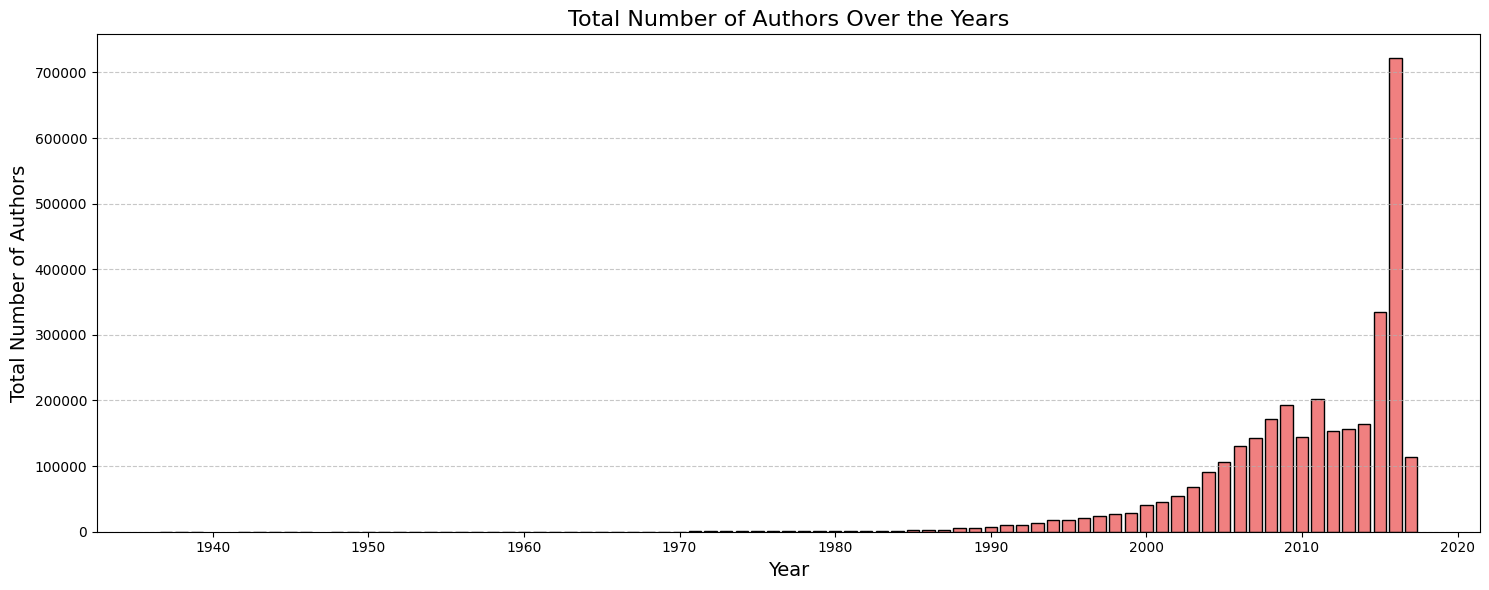

In [ ]:
# Convert 'authors' column to list if it's stored as a string
def count_authors(authors):
    try:
        # Safely evaluate strings that look like lists
        return len(ast.literal_eval(authors)) if isinstance(authors, str) else 0
    except (ValueError, SyntaxError):
        return 0

df['num_authors'] = df['authors'].apply(count_authors)

# Group by year and calculate total number of authors
yearly_authors = df.groupby('year')['num_authors'].sum()

# Drop years with NaN or 0 authors
yearly_authors = yearly_authors[yearly_authors > 0]

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(yearly_authors.index, yearly_authors.values, color='lightcoral', edgecolor='black')
plt.title("Total Number of Authors Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Number of Authors", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1.1.4

In [ ]:
import pandas as pd
import ast
from scipy.stats import pearsonr, spearmanr

# Function to parse lists from strings
def parse_list(column):
    if isinstance(column, str):
        try:
            return ast.literal_eval(column)  # Convert string representation of list to actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(column, list):
        return column  # Already a list
    return []  # Return empty list for other cases

# Apply parsing functions to the authors and references columns
df['authors'] = df['authors'].apply(parse_list)
df['references'] = df['references'].apply(parse_list)

# Compute number of authors and number of references per paper
df['num_authors'] = df['authors'].apply(len)
df['num_references'] = df['references'].apply(len)

# Compute Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df['num_authors'], df['num_references'])

# Compute Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df['num_authors'], df['num_references'])

# Print results
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")


Pearson Correlation Coefficient: 0.0560 (p-value: 0.0000)
Spearman Rank Correlation Coefficient: 0.0872 (p-value: 0.0000)


1.1.5 *****

In [ ]:
import pandas as pd
import ast
from scipy.stats import pearsonr, spearmanr

# Function to parse 'authors' field into a list
def parse_authors(authors):
    if isinstance(authors, str):
        try:
            return ast.literal_eval(authors)  # Convert string representation of list to actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(authors, list):
        return authors  # Already a list
    return []  # Return empty list for other cases

# Apply parsing to the authors column
df['authors'] = df['authors'].apply(parse_authors)

# Compute number of authors per paper
df['num_authors'] = df['authors'].apply(len)

# Ensure 'n_citation' is numeric
df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce')  # Convert to numeric (handle errors)

# Drop rows with NaN values in relevant columns
df = df.dropna(subset=['num_authors', 'n_citation'])

# Compute Pearson correlation
pearson_corr, pearson_p_value = pearsonr(df['num_authors'], df['n_citation'])

# Compute Spearman correlation
spearman_corr, spearman_p_value = spearmanr(df['num_authors'], df['n_citation'])

# Print results
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f} (p-value: {pearson_p_value:.4f})")
print(f"Spearman Rank Correlation Coefficient: {spearman_corr:.4f} (p-value: {spearman_p_value:.4f})")


Pearson Correlation Coefficient: -0.0028 (p-value: 0.0052)
Spearman Rank Correlation Coefficient: -0.0166 (p-value: 0.0000)


1.1.6

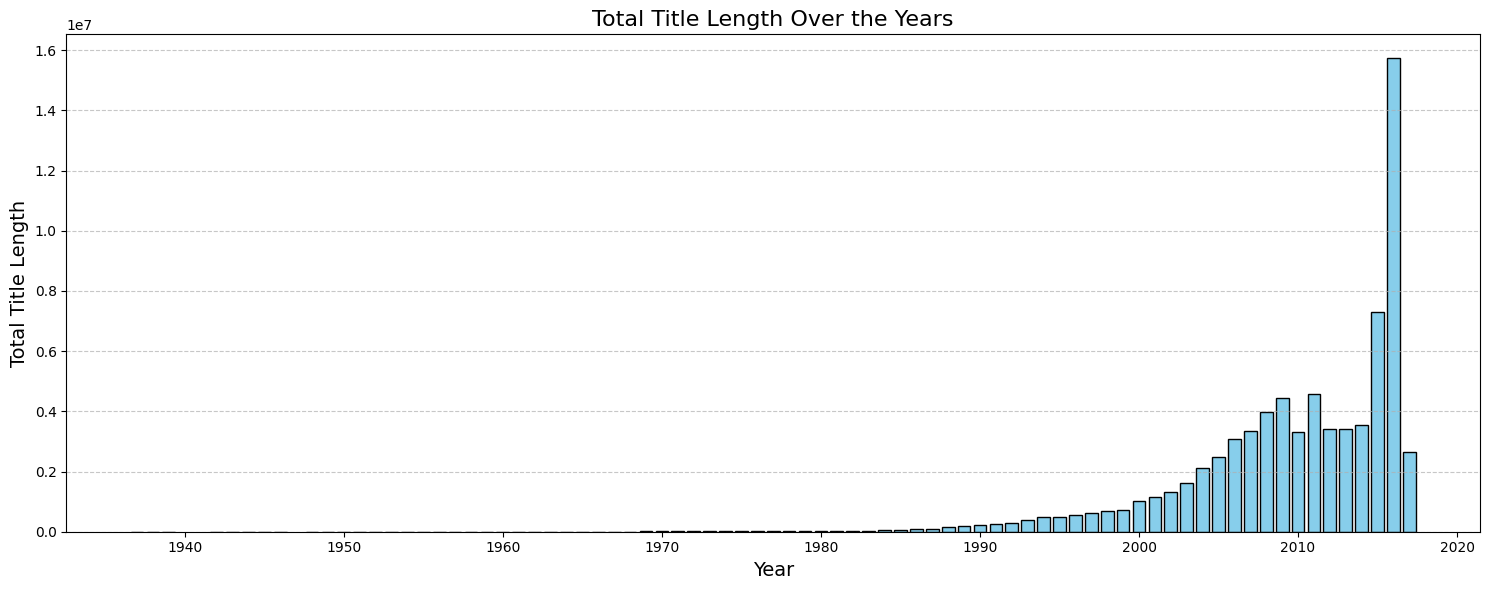

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate title length
df["title_length"] = df["title"].str.len()

# Group by year and calculate total title length
yearly_title_length = df.groupby("year")["title_length"].sum()

# Drop years with NaN or 0 title length
yearly_title_length = yearly_title_length[yearly_title_length > 0]

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(yearly_title_length.index, yearly_title_length.values, color="skyblue", edgecolor="black")
plt.title("Total Title Length Over the Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Title Length", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


1.1.7

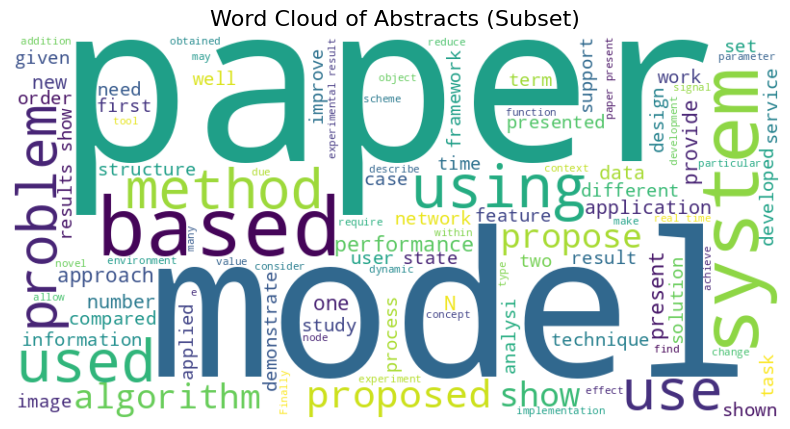

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Use a random sample of 1000 abstracts
subset_abstracts = df['abstract'].dropna().sample(100000, random_state=42)
# Step 2: Combine the subset into a single string
all_abstracts = " ".join(subset_abstracts)

# Step 3: Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    stopwords=None,
    collocations=True
).generate(all_abstracts)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud of Abstracts (Subset)", fontsize=16)
plt.show()

1.1.8

In [ ]:
import pandas as pd
import ast
from scipy.stats import pearsonr, spearmanr, kendalltau

# Function to parse references (convert string to list)
def parse_references(refs):
    if isinstance(refs, str):
        try:
            return ast.literal_eval(refs)  # Convert string representation of list to actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(refs, list):
        return refs
    return []

# Compute title lengths (number of characters)
df['title_length'] = df['title'].astype(str).apply(len)  # Change to len(title.split()) for word count

# Create a dictionary mapping paper IDs to title lengths
title_length_dict = dict(zip(df['id'], df['title_length']))

# Apply parsing to references column
df['references'] = df['references'].apply(parse_references)

# Compute the average title length of referenced papers
def avg_ref_title_length(refs):
    ref_lengths = [title_length_dict[ref] for ref in refs if ref in title_length_dict]  # Get title lengths
    return sum(ref_lengths) / len(ref_lengths) if ref_lengths else None  # Compute mean

df['avg_ref_title_length'] = df['references'].apply(avg_ref_title_length)

# Drop rows with missing values (some papers may have no valid references)
df_filtered = df.dropna(subset=['title_length', 'avg_ref_title_length'])

# Compute correlations
pearson_corr, pearson_p = pearsonr(df_filtered['title_length'], df_filtered['avg_ref_title_length'])
spearman_corr, spearman_p = spearmanr(df_filtered['title_length'], df_filtered['avg_ref_title_length'])
kendall_corr, kendall_p = kendalltau(df_filtered['title_length'], df_filtered['avg_ref_title_length'])

# Print results
print(f"Pearson Correlation: {pearson_corr:.4f} (p={pearson_p:.4f})")
print(f"Spearman Correlation: {spearman_corr:.4f} (p={spearman_p:.4f})")
print(f"Kendall’s Tau: {kendall_corr:.4f} (p={kendall_p:.4f})")


Pearson Correlation: 0.2718 (p=0.0000)
Spearman Correlation: 0.2737 (p=0.0000)
Kendall’s Tau: 0.1871 (p=0.0000)


1.1.9

In [ ]:
import pandas as pd
import ast
from collections import Counter

# Function to ensure 'authors' column is in list format
def parse_authors(authors):
    try:
        # Convert to list if it's a string representation of a list
        return ast.literal_eval(authors) if isinstance(authors, str) else authors
    except (ValueError, SyntaxError):
        # Return an empty list if it's an invalid string or not a list
        return []

# Handle any NaN or invalid values in 'authors' column by replacing them with an empty list
df['authors'] = df['authors'].apply(parse_authors)

# Flatten the list of all authors across all papers and count their occurrences
# Ensure there are no NaN values
author_counts = Counter([author for authors in df['authors'].dropna() for author in authors])

# Get the top 10 authors with the most publications
top_authors = author_counts.most_common(10)

# Convert to DataFrame for display
top_authors_df = pd.DataFrame(top_authors, columns=["Author", "Publication Count"])

# Display the result
print(top_authors_df)


        Author  Publication Count
0     Wei Wang                950
1    Wei Zhang                657
2     Yang Liu                629
3    Lei Zhang                579
4       Wei Li                559
5     Jun Wang                544
6     Lei Wang                519
7  Lajos Hanzo                458
8      Wei Liu                456
9    Jun Zhang                455


1.1.10

In [ ]:
import pandas as pd
import ast
from collections import Counter

# Function to ensure 'authors' column is in list format
def parse_authors(authors):
    try:
        return ast.literal_eval(authors) if isinstance(authors, str) else authors
    except (ValueError, SyntaxError):
        return []

# Ensure 'authors' column is properly parsed (if it's a string, convert to list)
df['authors'] = df['authors'].apply(parse_authors)

# Ensure 'n_citation' is numeric and handle any errors (missing or invalid data)
df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce')

# Dictionary to accumulate citations for each author
author_citations = {}

# Iterate over the rows of the DataFrame
for _, row in df.iterrows():
    authors = row['authors']
    citations = row['n_citation']

    # Check if citations are valid and authors list is not empty
    if pd.notna(citations) and isinstance(authors, list) and len(authors) > 0:
        # Distribute citations among authors
        for author in authors:
            if author in author_citations:
                author_citations[author] += citations
            else:
                author_citations[author] = citations

# Convert the dictionary to a DataFrame for easier handling
author_citation_df = pd.DataFrame(list(author_citations.items()), columns=['author', 'total_citations'])

# Sort by total citations and get the top 10 authors
top_10_authors_citations = author_citation_df.sort_values(by='total_citations', ascending=False).head(10)

# Display the result
print(top_10_authors_citations)


                  author  total_citations
76064      David G. Lowe            65344
10470  Hari Balakrishnan            55096
66231      Scott Shenker            54164
5468     Ian F. Akyildiz            53654
4582   Michael I. Jordan            53448
13263         Ion Stoica            52890
9141        Chih-Jen Lin            52302
3905        Takeo Kanade            50743
37768     Deborah Estrin            49925
547      Vladimir Vapnik            49755


1.1.11

In [ ]:
import pandas as pd
import ast

# Function to ensure 'references' column is in list format
def parse_references(references):
    try:
        return ast.literal_eval(references) if isinstance(references, str) else references
    except (ValueError, SyntaxError):
        return []

# Ensure 'references' column is properly parsed (if it's a string, convert to list)
df['references'] = df['references'].apply(parse_references)

# Handle missing references (NaN values), treat them as empty lists
df['references'] = df['references'].apply(lambda x: x if isinstance(x, list) else [])

# Count the number of references for each paper
df['num_references'] = df['references'].apply(len)

# Sort the papers by number of references and get the top 10
top_10_papers_references = df[['title', 'num_references']].sort_values(by='num_references', ascending=False).head(10)

# Display the result
print(top_10_papers_references)


                                                    title  num_references
371369  Comprehensive frequency-dependent substrate no...             759
780292                    Time in Qualitative Simulation.             561
104143                  Bibliography on cyclostationarity             412
214646  Fifty Years of MIMO Detection: The Road to Lar...             396
484969  An Exploration of Enterprise Architecture Rese...             394
223901  Structure and dynamics of molecular networks: ...             386
302124       The NP-completeness column: An ongoing guide             363
707510                                   Digital geometry             361
325083            Deep Learning: Methods and Applications             343
538381  Review: learning bayesian networks: Approaches...             326


1.1.12

In [ ]:
import pandas as pd

# Ensure 'n_citation' is numeric and handle any errors (missing or invalid data)
df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce')

# Sort the papers by 'n_citation' and get the top 10
top_10_papers_citations = df[['title', 'n_citation']].sort_values(by='n_citation', ascending=False).head(10)

# Display the result
print(top_10_papers_citations)


                                                    title  n_citation
332760  Distinctive Image Features from Scale-Invarian...       42508
294527  Bowling alone: the collapse and revival of Ame...       34288
358174      LIBSVM: A library for support vector machines       33016
716671                                     Random Forests       28679
18485                             Support-Vector Networks       26114
45248   MapReduce: simplified data processing on large...       24381
81801   A fast and elitist multiobjective genetic algo...       24245
150727  A theory for multiresolution signal decomposit...       24182
458466  ImageNet Classification with Deep Convolutiona...       22884
442067  Histograms of oriented gradients for human det...       22795


1.1.13

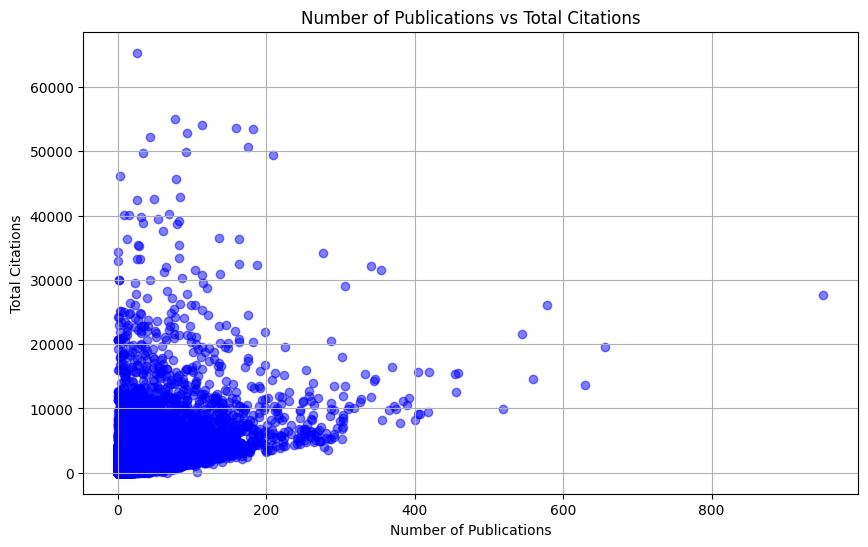

R-squared: 0.3387


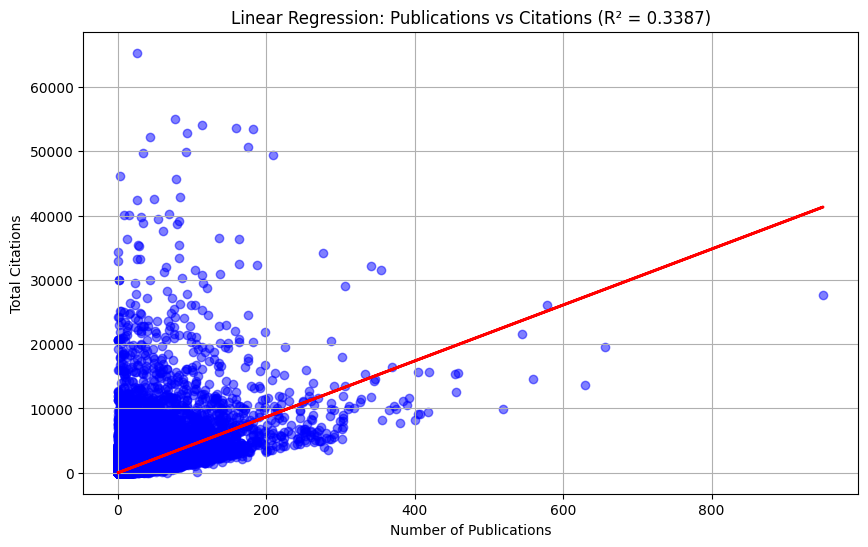

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
import ast

# Function to ensure 'authors' column is in list format
def parse_authors(authors):
    try:
        return ast.literal_eval(authors) if isinstance(authors, str) else authors
    except (ValueError, SyntaxError):
        return []

# Ensure 'authors' column is properly parsed (if it's a string, convert to list)
df['authors'] = df['authors'].apply(parse_authors)

# Ensure 'n_citation' is numeric and handle any errors (missing or invalid data)
df['n_citation'] = pd.to_numeric(df['n_citation'], errors='coerce')

# Step 1: Count the number of publications and total citations for each author
author_publications = Counter([author for authors in df['authors'] if isinstance(authors, list) for author in authors])

# Dictionary to accumulate total citations for each author
author_citations = {}

# Iterate over the rows of the DataFrame to accumulate citations
for _, row in df.iterrows():
    authors = row['authors']
    citations = row['n_citation']

    if pd.notna(citations) and isinstance(authors, list) and len(authors) > 0:
        for author in authors:
            if author in author_citations:
                author_citations[author] += citations
            else:
                author_citations[author] = citations

# Step 2: Create DataFrame with author statistics (publications, citations)
author_stats = pd.DataFrame({
    'author': list(author_publications.keys()),
    'publications': list(author_publications.values()),
    'total_citations': [author_citations.get(author, 0) for author in author_publications.keys()]
})

# Step 3: Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(author_stats['publications'], author_stats['total_citations'], color='blue', alpha=0.5)
plt.title("Number of Publications vs Total Citations")
plt.xlabel("Number of Publications")
plt.ylabel("Total Citations")
plt.grid(True)
plt.show()

# Step 4: Perform linear regression
X = author_stats[['publications']]  # Independent variable
y = author_stats['total_citations']  # Dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 5: Evaluate the model
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(author_stats['publications'], author_stats['total_citations'], color='blue', alpha=0.5)
plt.plot(author_stats['publications'], model.predict(X), color='red', linewidth=2)
plt.title(f"Linear Regression: Publications vs Citations (R² = {r_squared:.4f})")
plt.xlabel("Number of Publications")
plt.ylabel("Total Citations")
plt.grid(True)
plt.show()


1.2.1

Graph created with 2006578 nodes and 8718920 edges.


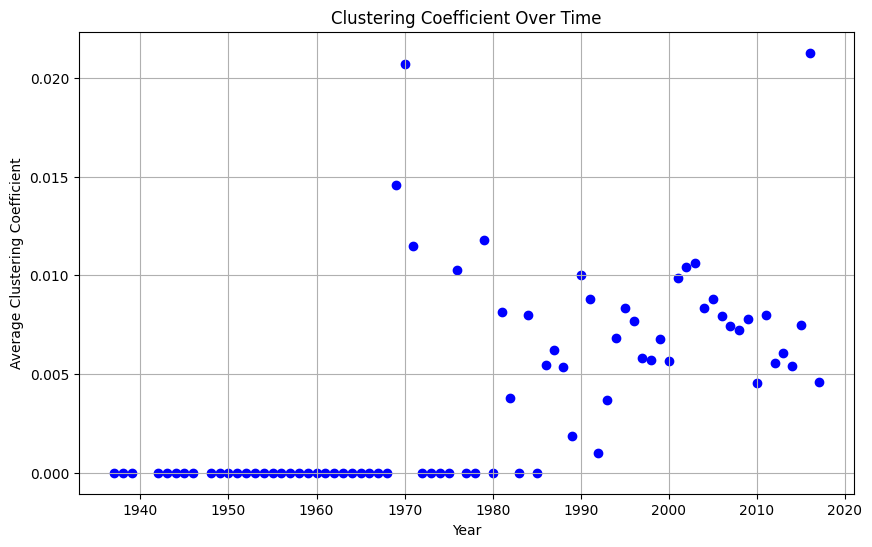

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

# Function to parse 'references' field into a list
def parse_references(refs):
    if isinstance(refs, str):
        try:
            return ast.literal_eval(refs)  # Convert string representation of list into an actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(refs, list):
        return refs  # Already a list
    return []  # Return empty list for other cases

# Apply parsing to the references column
df['references'] = df['references'].apply(parse_references)

# Step 1: Build the citation network (paper-paper network)
G = nx.DiGraph()  # Directed graph (papers citing other papers)

# First, add all papers as nodes (even if they have no references)
for paper_id in df['id']:
    G.add_node(paper_id)  # Ensure every paper is a node

# Then, add citation edges (paper_id -> references)
for _, row in df.iterrows():
    paper_id = row['id']
    references = row['references']

    # Add edges for valid references
    if isinstance(references, list):
        for ref in references:
            if ref and isinstance(ref, str):  # Only add valid references
                G.add_edge(paper_id, ref)  # Citation: paper_id cites ref

# Ensure the graph has nodes and edges before proceeding
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    print("Error: Citation network is empty. Please check the references data.")
else:
    print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Step 2: Plot clustering coefficient over time
def get_clustering_coefficient_per_year(df, G):
    clustering_coeffs = {}

    for year in sorted(df['year'].dropna().unique()):  # Avoid NaN years
        # Get all papers from the given year
        papers_in_year = df[df['year'] == year]['id'].tolist()

        # Subgraph for the papers in that year
        subgraph = G.subgraph(papers_in_year)

        # Compute clustering coefficients (even for isolated nodes)
        clustering_coeff = nx.clustering(subgraph.to_undirected())  # Convert to undirected

        # Compute average clustering coefficient for the year (if there are any nodes)
        if len(clustering_coeff) > 0:
            avg_clustering_coeff = sum(clustering_coeff.values()) / len(clustering_coeff)
            clustering_coeffs[year] = avg_clustering_coeff

    return clustering_coeffs

# Compute clustering coefficient per year
clustering_coeffs = get_clustering_coefficient_per_year(df, G)

# Plot clustering coefficient over time as separate dots (no connecting lines)
if len(clustering_coeffs) > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(clustering_coeffs.keys(), clustering_coeffs.values(), marker='o', color='b')
    plt.title("Clustering Coefficient Over Time")
    plt.xlabel("Year")
    plt.ylabel("Average Clustering Coefficient")
    plt.grid(True)
    plt.show()
else:
    print("No clustering coefficients available to plot. Ensure references are correctly parsed.")


In [ ]:
# Step 1: Compute the largest weakly connected component (since citations create a directed graph)
largest_cc = max(nx.weakly_connected_components(G), key=len)  # Get largest weakly connected component
G_sub = G.subgraph(largest_cc)  # Create subgraph

# Check if the largest component is strongly connected
if nx.is_strongly_connected(G_sub):
    avg_path_length = nx.average_shortest_path_length(G_sub)
    diameter = nx.diameter(G_sub)
    print(f"Average Path Length: {avg_path_length}")
    print(f"Diameter: {diameter}")
else:
    print("The subgraph is not strongly connected. Computing on the largest strongly connected component...")

    # Find the largest strongly connected component
    largest_scc = max(nx.strongly_connected_components(G_sub), key=len)
    G_scc = G_sub.subgraph(largest_scc)

    if len(G_scc) > 1:  # Only compute if there's more than one node
        avg_path_length = nx.average_shortest_path_length(G_scc)
        diameter = nx.diameter(G_scc)
        print(f"Average Path Length (SCC): {avg_path_length}")
        print(f"Diameter (SCC): {diameter}")
    else:
        print("No strongly connected component large enough for path calculations.")

# Step 2: Compute PageRank to Identify Influential Papers
pagerank_scores = nx.pagerank(G)  # Run PageRank on the full graph

# Sort papers by PageRank score
sorted_papers_by_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 influential papers based on PageRank
print("\nTop 10 Influential Papers (based on PageRank):")
for i, (paper_id, score) in enumerate(sorted_papers_by_pagerank[:10]):
    print(f"{i+1}. Paper ID: {paper_id}, PageRank Score: {score}")


The subgraph is not strongly connected. Computing on the largest strongly connected component...
Average Path Length (SCC): 11.288044063779358
Diameter (SCC): 29

Top 10 Influential Papers (based on PageRank):
1. Paper ID: 6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3, PageRank Score: 0.0002234734396393853
2. Paper ID: c1b6b493-01ef-420f-be44-7bacfe34e846, PageRank Score: 0.00019128161048528232
3. Paper ID: b944f77f-113b-4a02-ae5e-d4a124b8fd5b, PageRank Score: 0.00017979478285836238
4. Paper ID: f6bd8b64-684d-429a-aab5-8ff3a2c23cd6, PageRank Score: 0.00013839603811788994
5. Paper ID: 2659531e-eb9d-4dd5-b46f-10f66a4819c6, PageRank Score: 0.00011580422473495846
6. Paper ID: 748a2ab3-8b5f-4d0a-9e2d-af685089843a, PageRank Score: 0.00010567984642424661
7. Paper ID: e0f3a738-4ab2-40d1-ba44-506d81c1d230, PageRank Score: 9.731396921113041e-05
8. Paper ID: 8026f56a-a93e-4933-8ead-c9aa9e3f0498, PageRank Score: 9.394110306534417e-05
9. Paper ID: 7ccbdf09-a84e-4ad2-ab20-cb28b6c41155, PageRank Score: 9.3271

1.2.2

In [ ]:
import pandas as pd
import networkx as nx
import ast

# Function to parse 'authors' field into a list
def parse_authors(authors):
    if isinstance(authors, str):
        try:
            return ast.literal_eval(authors)  # Convert string representation of list into actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(authors, list):
        return authors  # Already a list
    return []  # Return empty list for other cases

# Apply parsing to the authors column
df['authors'] = df['authors'].apply(parse_authors)

# Select a random subset of 1000 rows (without replacement)
df_subset = df.sample(n=1000, random_state=42)

# Step 1: Build the co-authorship network
G_coauthor = nx.Graph()  # Undirected graph for co-authorship

# Add edges between co-authors (each paper forms a clique of authors)
for _, row in df_subset.iterrows():
    authors = row['authors']

    # Add nodes and edges for co-authors
    if isinstance(authors, list) and len(authors) > 1:
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):  # Connect each pair of authors
                G_coauthor.add_edge(authors[i], authors[j])

# Ensure the graph has nodes and edges before proceeding
if G_coauthor.number_of_nodes() == 0 or G_coauthor.number_of_edges() == 0:
    print("Error: Co-authorship network is empty. Please check the authors data.")
else:
    print(f"Graph created with {G_coauthor.number_of_nodes()} nodes and {G_coauthor.number_of_edges()} edges.")


Graph created with 3004 nodes and 4866 edges.


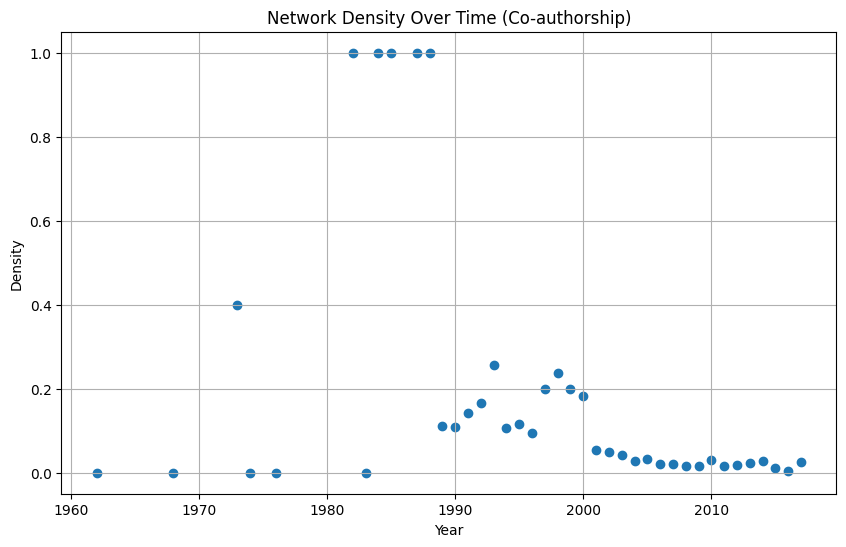


Top 10 Influential Authors by Degree Centrality:
                    Author    Degree  Betweenness  Closeness
2691     Evgeni M. Zdobnov  0.008991          0.0   0.008991
2675       Laurent Falquet  0.008991          0.0   0.008991
2688           Marco Pagni  0.008991          0.0   0.008991
2687              Tom Oinn  0.008991          0.0   0.008991
2686         Nicola Mulder  0.008991          0.0   0.008991
2685            Beate Marx  0.008991          0.0   0.008991
2684         Rodrigo Lopez  0.008991          0.0   0.008991
2683  Youla Karavidopoulou  0.008991          0.0   0.008991
2682     Alexander Kanapin  0.008991          0.0   0.008991
2681           Daniel Kahn  0.008991          0.0   0.008991

Example of Author Communities (Showing 5 authors from each community):
Community 0: ['Maria G. Koziri', 'Panos Papadopoulos', 'Nikos Tziritas', 'Antonios N. Dadaliaris', 'Thanasis Loukopoulos'] ...
Community 1: ['Luís Fernando Orleans', 'Geraldo Zimbrão'] ...
Community 2: ['Art

In [ ]:
import pandas as pd
import networkx as nx
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
from community import community_louvain  # For community detection

# --- Compute Network Density Per Year ---
def compute_network_density_per_year(df_subset, G_coauthor):
    density_per_year = {}

    for year in sorted(df_subset['year'].dropna().unique()):  # Loop over each year
        authors_in_year = set()

        # Collect all authors who published in that year
        for _, row in df_subset[df_subset['year'] == year].iterrows():
            authors_in_year.update(row['authors'])

        # Create subgraph for that year's authors
        subgraph = G_coauthor.subgraph(authors_in_year)

        # Compute density if there are at least 2 nodes
        if subgraph.number_of_nodes() > 1:
            density_per_year[year] = nx.density(subgraph)
        else:
            density_per_year[year] = 0  # If only one author, density is 0

    return density_per_year

# --- Identify Influential Authors Using Centrality Measures ---
def compute_centrality_measures(G_coauthor):
    degree_centrality = nx.degree_centrality(G_coauthor)
    betweenness_centrality = nx.betweenness_centrality(G_coauthor)
    closeness_centrality = nx.closeness_centrality(G_coauthor)

    # Convert to DataFrame for easy analysis
    centrality_df = pd.DataFrame({
        'Author': list(degree_centrality.keys()),
        'Degree': list(degree_centrality.values()),
        'Betweenness': list(betweenness_centrality.values()),
        'Closeness': list(closeness_centrality.values())
    })

    return centrality_df

# --- Find Communities of Authors ---
def detect_author_communities(G_coauthor):
    communities = community_louvain.best_partition(G_coauthor)  # Louvain method
    return communities

# --- Execute the analyses ---
# 1. Compute density per year
density_per_year = compute_network_density_per_year(df_subset, G_coauthor)

# 2. Compute centrality measures
centrality_df = compute_centrality_measures(G_coauthor)

# 3. Find author communities
author_communities = detect_author_communities(G_coauthor)

# --- Plot Network Density Over Time ---
plt.figure(figsize=(10, 6))
plt.scatter(density_per_year.keys(), density_per_year.values())  # Scatter plot (no connecting lines)
plt.title("Network Density Over Time (Co-authorship)")
plt.xlabel("Year")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# --- Print the Top 10 Most Influential Authors ---
print("\nTop 10 Influential Authors by Degree Centrality:")
print(centrality_df.sort_values(by='Degree', ascending=False).head(10))

# --- Print Community Information ---
print("\nExample of Author Communities (Showing 5 authors from each community):")
community_groups = defaultdict(list)
for author, community in author_communities.items():
    community_groups[community].append(author)

for comm, members in list(community_groups.items())[:5]:  # Show first 5 communities
    print(f"Community {comm}: {members[:5]} ...")  # Show 5 members from each


1.2.3

In [ ]:
import pandas as pd
import networkx as nx
import ast

# Function to parse references safely
def parse_references(refs):
    if isinstance(refs, str):
        try:
            return ast.literal_eval(refs)  # Convert string to list
        except (ValueError, SyntaxError):
            return []
    elif isinstance(refs, list):
        return refs
    return []

# Step 1: Apply parsing
df['references'] = df['references'].apply(parse_references)

# Step 2: Create a dictionary {paper_id: venue}
venue_dict = dict(zip(df['id'], df['venue']))

# Step 3: Build the Venue Network
G_venue = nx.Graph()

for _, row in df.iterrows():
    paper_venue = row['venue']
    if not paper_venue:  # Skip if venue is missing
        continue

    for ref in row['references']:
        ref_venue = venue_dict.get(ref)

        if ref_venue and ref_venue != paper_venue:  # Ensure different venues
            G_venue.add_edge(paper_venue, ref_venue)

# Step 4: Print basic info
print(f"Venue Graph created with {G_venue.number_of_nodes()} nodes and {G_venue.number_of_edges()} edges.")


Venue Graph created with 3762 nodes and 303290 edges.


In [ ]:
import networkx as nx
import community.community_louvain as cl
import matplotlib.pyplot as plt
from collections import defaultdict

# --- Step 1: Interdisciplinary Collaborations (Louvain Clustering) ---
# Apply Louvain community detection
communities = cl.best_partition(G_venue)

# Count how many venues per community
community_sizes = {}
for venue, comm in communities.items():
    community_sizes[comm] = community_sizes.get(comm, 0) + 1

# Sort and print top interdisciplinary clusters
sorted_communities = sorted(community_sizes.items(), key=lambda x: x[1], reverse=True)
print("Top Interdisciplinary Clusters:")
for comm, size in sorted_communities[:5]:  # Show top 5
    venues_in_community = [v for v, c in communities.items() if c == comm]
    print(f"Community {comm}: {size} venues → {venues_in_community[:5]}...")  # Show first 5 venues

# --- Step 2: Find the Most Influential Venues ---
# Degree Centrality (number of direct connections)
degree_centrality = nx.degree_centrality(G_venue)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# PageRank (importance based on network structure)
pagerank = nx.pagerank(G_venue)
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# Print results
print("\nTop Influential Venues (Degree Centrality):")
for venue, score in top_degree:
    print(f"{venue}: {score:.4f}")

print("\nTop Influential Venues (PageRank):")
for venue, score in top_pagerank:
    print(f"{venue}: {score:.4f}")

# --- Step 3: Identify Emerging Fields Based on Newly Formed Venue Connections ---
# Step 1: Track connections per year
# Track connections per year
venue_edges_by_year = defaultdict(set)

for _, row in df.iterrows():
    paper_venue = str(row['venue']) if pd.notna(row['venue']) else None
    paper_year = row['year']

    for ref in row['references']:
        ref_venue = str(venue_dict.get(ref)) if ref in venue_dict and pd.notna(venue_dict.get(ref)) else None

        if paper_venue and ref_venue and ref_venue != paper_venue:
            venue_edges_by_year[paper_year].add(tuple(sorted([paper_venue, ref_venue])))


# Step 2: Find newly formed venue connections
years = sorted(venue_edges_by_year.keys())
new_connections = {}

for i in range(1, len(years)):  # Compare each year with the previous one
    prev_year = years[i - 1]
    curr_year = years[i]

    new_edges = venue_edges_by_year[curr_year] - venue_edges_by_year[prev_year]
    new_connections[curr_year] = new_edges

# Step 3: Print emerging interdisciplinary fields
print("\nEmerging Interdisciplinary Fields:")
for year, edges in new_connections.items():
    print(f"{year}: {len(edges)} new venue connections")
    if len(edges) > 0:
        print(f"   Examples: {list(edges)[:5]}")  # Show first 5 new connections


Top Interdisciplinary Clusters:
Community 1: 1070 venues → ['IEEE Computer Graphics and Applications', 'international conference in central europe on computer graphics and visualization', 'IEEE Transactions on Circuits and Systems for Video Technology', 'international conference on image processing', 'Neurocomputing']...
Community 3: 987 venues → [nan, 'international conference on management of data', 'very large data bases', 'international conference on data engineering', 'Communications of The ACM']...
Community 0: 853 venues → ['international symposium on computers and communications', 'IEEE Communications Letters', 'IEEE Journal on Selected Areas in Communications', 'IEEE Transactions on Communications', 'IEEE Transactions on Computers']...
Community 2: 468 venues → ['IEEE Transactions on Information Theory', 'foundations of computer science', 'ACM Communications in Computer Algebra', 'ACM Sigsam Bulletin', 'winter simulation conference']...
Community 4: 384 venues → ['programming 

1.2.4

Graph created with 2006578 nodes and 8718920 edges.


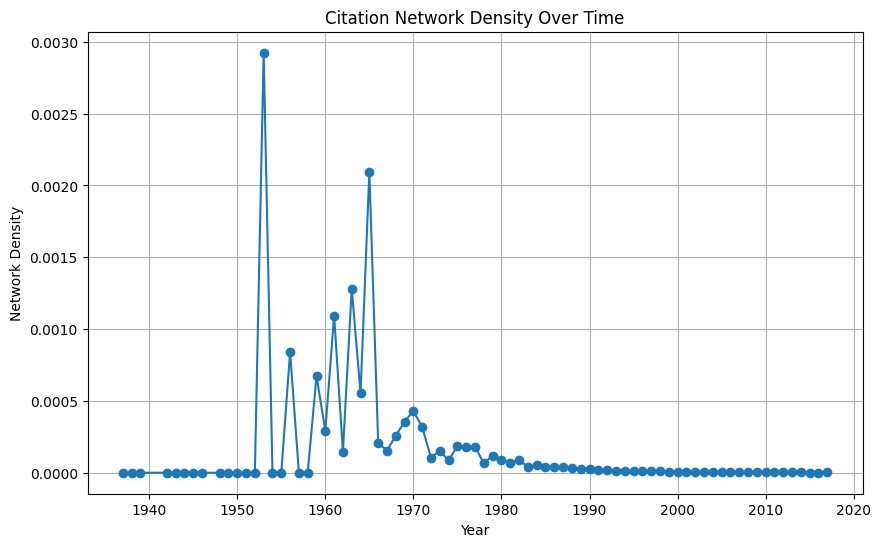


Top 10 Bursting Papers (Highest Citation Growth):
Paper ID: b944f77f-113b-4a02-ae5e-d4a124b8fd5b, Citations: 5841
Paper ID: c1b6b493-01ef-420f-be44-7bacfe34e846, Citations: 5057
Paper ID: 6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3, Citations: 3288
Paper ID: dd83785a-dd19-41e3-9b25-ebabbd48d336, Citations: 3279
Paper ID: e2f7a74a-8430-4463-94ce-fe85dfd309f9, Citations: 3242
Paper ID: f6bd8b64-684d-429a-aab5-8ff3a2c23cd6, Citations: 3235
Paper ID: 50dd56db-151d-4d62-8576-65f0ef6f381b, Citations: 2281
Paper ID: 8026f56a-a93e-4933-8ead-c9aa9e3f0498, Citations: 2279
Paper ID: 748a2ab3-8b5f-4d0a-9e2d-af685089843a, Citations: 2259
Paper ID: ebfca554-7a3c-4597-954b-07336a2e3030, Citations: 2238


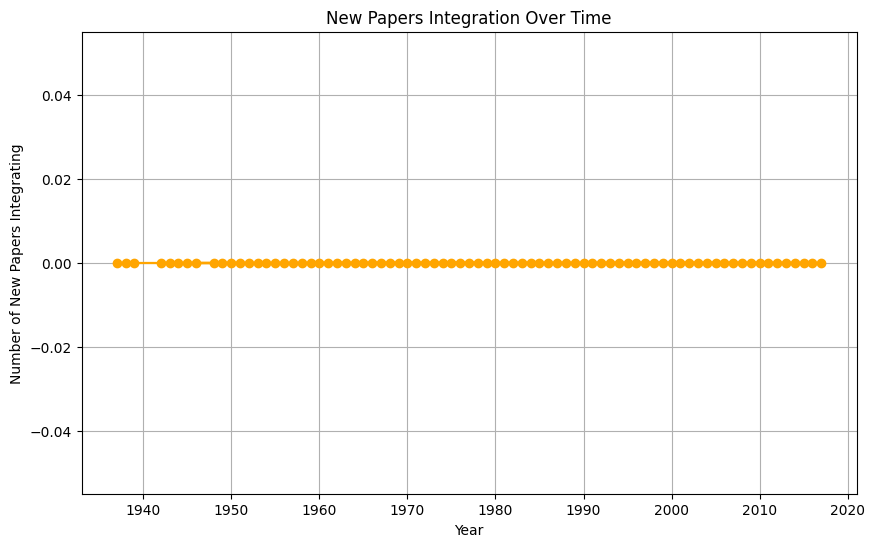

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import ast

# Function to parse 'references' field into a list
def parse_references(refs):
    if isinstance(refs, str):
        try:
            return ast.literal_eval(refs)  # Convert string representation of list into an actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(refs, list):
        return refs  # Already a list
    return []  # Return empty list for other cases

# Apply parsing to the references column
df['references'] = df['references'].apply(parse_references)

# Step 1: Build the citation network (paper-paper network)
G = nx.DiGraph()  # Directed graph (papers citing other papers)

# First, add all papers as nodes (even if they have no references)
for paper_id in df['id']:
    G.add_node(paper_id)  # Ensure every paper is a node

# Then, add citation edges (paper_id -> references)
for _, row in df.iterrows():
    paper_id = row['id']
    references = row['references']

    # Add edges for valid references
    if isinstance(references, list):
        for ref in references:
            if ref and isinstance(ref, str):  # Only add valid references
                G.add_edge(paper_id, ref)  # Citation: paper_id cites ref

# Ensure the graph has nodes and edges before proceeding
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    print("Error: Citation network is empty. Please check the references data.")
else:
    print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# --- Step 2: Plot Network Density per Year ---
def compute_network_density_per_year(df, G):
    density_per_year = {}

    for year in sorted(df['year'].dropna().unique()):
        papers_in_year = set(df[df['year'] == year]['id'])  # Papers published in that year

        # Create subgraph for that year's papers
        subgraph = G.subgraph(papers_in_year)

        # Compute density if there are at least 2 nodes
        if subgraph.number_of_nodes() > 1:
            density_per_year[year] = nx.density(subgraph)
        else:
            density_per_year[year] = 0  # If only one paper, density is 0

    return density_per_year

# Compute network density per year
density_per_year = compute_network_density_per_year(df, G)

# Plot Network Density Over Time
plt.figure(figsize=(10, 6))
plt.plot(density_per_year.keys(), density_per_year.values(), marker='o')
plt.title("Citation Network Density Over Time")
plt.xlabel("Year")
plt.ylabel("Network Density")
plt.grid(True)
plt.show()

# --- Step 3: Identify Bursts of Influential Papers ---
def identify_bursts(df, G):
    citation_counts = {paper: 0 for paper in G.nodes()}  # Initialize citation counts

    # Count citations per paper
    for _, row in df.iterrows():
        paper_id = row['id']
        references = row['references']

        if isinstance(references, list):
            for ref in references:
                citation_counts[ref] += 1  # Increment citation count for referenced paper

    # Sort by citation count (descending)
    burst_papers = sorted(citation_counts.items(), key=lambda x: x[1], reverse=True)

    return burst_papers[:10]  # Top 10 papers with most citations

# Identify burst papers
burst_papers = identify_bursts(df, G)

print("\nTop 10 Bursting Papers (Highest Citation Growth):")
for paper, citation_count in burst_papers:
    print(f"Paper ID: {paper}, Citations: {citation_count}")

# --- Step 4: Examine How New Papers Integrate into the Existing Network ---
def new_papers_integration(df, G):
    integration_per_year = {}

    for _, row in df.iterrows():
        paper_id = row['id']
        year = row['year']
        references = row['references']

        if isinstance(references, list):
            new_papers = [ref for ref in references if ref not in G.nodes()]

            # Count how many new papers are being integrated into the network
            integration_per_year[year] = integration_per_year.get(year, 0) + len(new_papers)

    return integration_per_year

# Track new papers integration
new_papers_integration_data = new_papers_integration(df, G)

# Plot New Papers Integration Over Time
plt.figure(figsize=(10, 6))
plt.plot(new_papers_integration_data.keys(), new_papers_integration_data.values(), marker='o', color='orange')
plt.title("New Papers Integration Over Time")
plt.xlabel("Year")
plt.ylabel("Number of New Papers Integrating")
plt.grid(True)
plt.show()


2.1

In [ ]:
import pandas as pd
import networkx as nx
import ast
import community.community_louvain as cl
from sklearn.cluster import SpectralClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import random

# Function to parse 'authors' field into a list
def parse_authors(authors):
    if isinstance(authors, str):
        try:
            return ast.literal_eval(authors)  # Convert string representation of list into actual list
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    elif isinstance(authors, list):
        return authors  # Already a list
    return []  # Return empty list for other cases

# Select a random subset of 1000 rows from the dataset
subset_df = df.sample(n=1000, random_state=42)

# Apply parsing to the authors column
subset_df['authors'] = subset_df['authors'].apply(parse_authors)

# Step 1: Build the author-author co-authorship network
G_authors = nx.Graph()  # Undirected graph for co-authorship

# Add edges between co-authors (each paper forms a clique of authors)
for _, row in subset_df.iterrows():
    authors = row['authors']

    if isinstance(authors, list) and len(authors) > 1:
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):  # Connect each pair of authors
                G_authors.add_edge(authors[i], authors[j])

# Ensure the graph has nodes and edges before proceeding
if G_authors.number_of_nodes() == 0 or G_authors.number_of_edges() == 0:
    print("Error: Author-author network is empty. Please check the authors data.")
else:
    print(f"Graph created with {G_authors.number_of_nodes()} nodes and {G_authors.number_of_edges()} edges.")

# --- Step 2: Apply Clustering Algorithms on the Subset ---

# 1. Louvain Method
partition = cl.best_partition(G_authors)
louvain_communities = partition
print(f"Louvain Method: Communities: {set(partition.values())}")

# 2. Spectral Clustering
# Convert graph to adjacency matrix
adj_matrix = nx.to_numpy_array(G_authors)

# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=5, affinity='precomputed', random_state=42)
spectral_labels = spectral_clustering.fit_predict(adj_matrix)

# Add spectral clustering results to nodes
spectral_communities = dict(zip(G_authors.nodes(), spectral_labels))
print(f"Spectral Clustering: Communities: {set(spectral_labels)}")

# 3. Hierarchical Clustering
# Compute distance matrix for hierarchical clustering
distance_matrix = nx.to_numpy_array(G_authors)  # Use the adjacency matrix as the distance matrix

# Perform hierarchical clustering
Z = sch.linkage(distance_matrix, method='ward')


# Extract clusters from hierarchical clustering
hierarchical_labels = sch.fcluster(Z, t=1.5, criterion='distance')
hierarchical_communities = dict(zip(G_authors.nodes(), hierarchical_labels))
print(f"Hierarchical Clustering: Communities: {set(hierarchical_labels)}")

# --- Step 3: Evaluate the Clustering ---
def calculate_clustering_coefficient(G, communities):
    coeffs = []
    for community_id in set(communities.values()):
        community_nodes = [node for node, comm in communities.items() if comm == community_id]
        subgraph = G.subgraph(community_nodes)
        if subgraph.number_of_nodes() > 1:  # Avoid division by zero
            coeffs.append(nx.average_clustering(subgraph))
    return coeffs

# Evaluating clustering coefficients
louvain_coeffs = calculate_clustering_coefficient(G_authors, louvain_communities)
spectral_coeffs = calculate_clustering_coefficient(G_authors, spectral_communities)
hierarchical_coeffs = calculate_clustering_coefficient(G_authors, hierarchical_communities)

print(f"Louvain Method Clustering Coefficients: {sum(louvain_coeffs) / len(louvain_coeffs) if louvain_coeffs else 0}")
print(f"Spectral Clustering Coefficients: {sum(spectral_coeffs) / len(spectral_coeffs) if spectral_coeffs else 0}")
print(f"Hierarchical Clustering Coefficients: {sum(hierarchical_coeffs) / len(hierarchical_coeffs) if hierarchical_coeffs else 0}")

# Determine the best clustering method
best_method = max([
    ('Louvain', sum(louvain_coeffs) / len(louvain_coeffs) if louvain_coeffs else 0),
    ('Spectral', sum(spectral_coeffs) / len(spectral_coeffs) if spectral_coeffs else 0),
    ('Hierarchical', sum(hierarchical_coeffs) / len(hierarchical_coeffs) if hierarchical_coeffs else 0)
], key=lambda x: x[1])

print(f"Best clustering method: {best_method[0]} with coefficient {best_method[1]}")


Graph created with 3004 nodes and 4866 edges.
Louvain Method: Communities: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering: Communities: {0, 1, 2, 3, 4}


<ipython-input-5-93e79364cae3>:69: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(distance_matrix, method='ward')


Hierarchical Clustering: Communities: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

In [5]:
import pandas as pd
import networkx as nx
import ast
import scipy.cluster.hierarchy as sch

# Function to parse 'authors' field into a list
def parse_authors(authors):
    if isinstance(authors, str):
        try:
            return ast.literal_eval(authors)  # Convert string representation of list into actual list
        except (ValueError, SyntaxError):
            return []
    elif isinstance(authors, list):
        return authors
    return []

# Select a random subset of 5000 rows
subset_df = df.sample(n=5000, random_state=42)

# Apply parsing to the authors column
subset_df['authors'] = subset_df['authors'].apply(parse_authors)

# Step 1: Build the author-author co-authorship network
G_authors = nx.Graph()

for _, row in subset_df.iterrows():
    authors = row['authors']
    if isinstance(authors, list) and len(authors) > 1:
        for i in range(len(authors)):
            for j in range(i + 1, len(authors)):
                G_authors.add_edge(authors[i], authors[j])

# Ensure the graph is not empty
if G_authors.number_of_nodes() == 0 or G_authors.number_of_edges() == 0:
    print("Error: Author-author network is empty.")
else:
    print(f"Graph created with {G_authors.number_of_nodes()} nodes and {G_authors.number_of_edges()} edges.")

# Step 2: Apply Hierarchical Clustering
# Convert graph to adjacency matrix
distance_matrix = nx.to_numpy_array(G_authors)

# Perform hierarchical clustering
Z = sch.linkage(distance_matrix, method='ward')

# Extract clusters
hierarchical_labels = sch.fcluster(Z, t=1.5, criterion='distance')
hierarchical_communities = dict(zip(G_authors.nodes(), hierarchical_labels))

# Find and display the number of communities
num_communities = len(set(hierarchical_labels))
print(f"Number of communities found using Hierarchical Clustering: {num_communities}")

# Display communities
for comm_id in set(hierarchical_labels):
    members = [node for node, label in hierarchical_communities.items() if label == comm_id]
    print(f"Community {comm_id}: {members[:10]}... ({len(members)} members)")


Graph created with 14820 nodes and 26409 edges.


<ipython-input-5-1ff449369e1e>:44: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(distance_matrix, method='ward')


Number of communities found using Hierarchical Clustering: 3598
Community 1: ['Ewan Birney', 'Henning Hermjakob']... (2 members)
Community 2: ['Gautier Koscielny', 'Peter An', 'Denise R. Carvalho-Silva', 'Jennifer A. Cham', 'Luca Fumis', 'Rippa Gasparyan', 'Samiul Hasan', 'Nikiforos Karamanis', 'Michael Maguire', 'Eliseo Papa']... (54 members)
Community 3: ['Dale Greenley', 'J. Bauman', 'D. Chang', 'Dennis Chen', 'R. Eltejaein', 'P. Ferolito', 'P. Fu', 'Robert B. Garner', 'D. Greenhill', 'H. Grewal']... (29 members)
Community 4: ['Rolf Apweiler', 'Terri K. Attwood', 'Amos Marc Bairoch', 'Alex Bateman', 'Margaret Biswas', 'Lorenzo Cerutti', 'Florence Corpet', 'Michael D. R. Croning', 'Richard Durbin', 'Laurent Falquet']... (25 members)
Community 5: ['Philipp Bucher']... (1 members)
Community 6: ['Salman Habib', 'R. Roser', 'T. LeCompte', 'Zach Marshall', 'A. W. Borgland', 'B. Viren', 'Peter Edward Nugent', 'Makoto Asai', 'Lothar Bauerdick', 'Hal Finkel']... (25 members)
Community 7: ['M

2.2

In [6]:
!pip install keybert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 515.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from keybert import KeyBERT
import pandas as pd
from collections import defaultdict
import ast

# Initialize KeyBERT model
kw_model = KeyBERT()

# Function to extract keywords from title and abstract
def extract_keywords(title, abstract, top_n=5):
    text = f"{title}. {abstract}"
    keywords = kw_model.extract_keywords(text, top_n=top_n)
    return [kw[0] for kw in keywords]

# Apply this function to each paper in the subset_df
subset_df['keywords'] = subset_df.apply(lambda row: extract_keywords(row['title'], row['abstract']), axis=1)

# Step 4: Associate Each Paper with the Corresponding Community
paper_communities = {index: hierarchical_communities[author] for index, authors in subset_df['authors'].iteritems() for author in authors}
subset_df['community'] = subset_df.index.map(paper_communities)

# Step 5: Aggregate Keywords for Each Community
community_keywords = {}
for comm_id in set(hierarchical_labels):
    community_papers = subset_df[subset_df['community'] == comm_id]
    all_keywords = [kw for keywords in community_papers['keywords'] for kw in keywords]
    most_common_keywords = [item[0] for item in Counter(all_keywords).most_common(10)]  # Top 10 keywords
    community_keywords[comm_id] = most_common_keywords

# Display aggregated keywords for each community
for comm_id, keywords in community_keywords.items():
    print(f"Community {comm_id}: {keywords}")

# Step 6: Name Each Community
community_names = {}
for comm_id, keywords in community_keywords.items():
    community_names[comm_id] = f"Community {comm_id} - {keywords[0]}"  # Use top keyword as community name

# Print community names
for comm_id, name in community_names.items():
    print(f"Community {comm_id} is named: {name}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2.3.1

In [ ]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the SentenceBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to get the embedding for title and abstract
def get_embedding(title, abstract, keywords, model):
    # Combine title, abstract, and keywords (keywords are appended as plain text)
    text = f"{title} {abstract} {' '.join(keywords)}"
    # Return the embedding of the combined text
    return model.encode(text)

# Apply the function to each paper
df['embedding'] = df.apply(lambda row: get_embedding(row['title'], row['abstract'], row['keywords'], model), axis=1)


2.3.3

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Number of clusters (this can be tuned based on your needs)
n_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(list(df['embedding']))

# Evaluate the clustering using Silhouette Score and Davies-Bouldin Index
silhouette_avg = silhouette_score(np.array(list(df['embedding'])), df['cluster'])
dbi_score = davies_bouldin_score(np.array(list(df['embedding'])), df['cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {dbi_score}")
